In [35]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging
from gensim import corpora, models, similarities
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


# Pandas

pandas examples in context of our problem

In [3]:
pdf = pd.read_csv("data/linkSO/linkso/topublish/python/python_qid2all.txt", sep ='\t', \
                    names = ['qID', 'qHeader', 'qDescription', 'topVotedAnswer', 'type'])
pdf['type']= 'python'

pdf[:3]

,qID,qHeader,qDescription,topVotedAnswer,type
0,27787264,pandas query throws error column name starts n...,trying perform query following dataframe works...,query uses pandas eval evaluate python express...,python
1,35651586,psycopg cursor already closed,using psycopg bunch queries need execute seque...,presumably connection dropped would need reest...,python
2,30342145,redemption setting display name,using add pst file attached pst outlook proble...,pst provider sometimes ignores specified displ...,python


In [4]:
pyscore =pd.read_csv("data/linkSO/linkso/topublish/python/python_cosidf.txt", sep ='\t', \
                    names = ['qID_1', 'qID_2', 'score', 'label'], skiprows=1)

trainids = pd.read_csv("data/linkSO/linkso/topublish/python/python_train_qid.txt", sep = '\t',\
                      names = ['qId'])
testids = pd.read_csv("data/linkSO/linkso/topublish/python/python_test_qid.txt", sep = '\t',\
                      names = ['qId'])
validids = pd.read_csv("data/linkSO/linkso/topublish/python/python_valid_qid.txt", sep = '\t',\
                      names = ['qId'])


In [5]:
pyscore[:3]

,qID_1,qID_2,score,label
0,37098725,36808565,0.758667,1
1,37098725,30049387,0.735980,0
2,37098725,25520945,0.656788,0


In [15]:
pyscore['label'].value_counts()

0    184894
1      7406
Name: label, dtype: int64

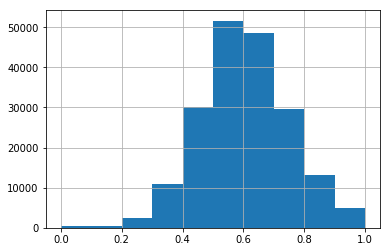

In [16]:
pyscore['score'].hist()

In [17]:
pdf.columns

Index(['qID', 'qHeader', 'qDescription', 'topVotedAnswer', 'type'], dtype='object')

In [6]:
pdf.loc[:,'text']=pdf['qHeader']+pdf['qDescription']+pdf['topVotedAnswer']

# Gensim

Here we'll demonstrate the use of gensim for standar IR operations. But first we need to get vocabulary set and sparse representation of corpus.

In [25]:
documents=pdf['text'][:10]

In [26]:
from collections import defaultdict
frequency = defaultdict(int)
for d in documents:
    for token in d.split():
        frequency[token]+=1
        
bowdocs = [[token for token in d.split(" ") if frequency[token]>1] 
           for d in documents]

In [33]:
dictionary = corpora.Dictionary(bowdocs)
corpus=[dictionary.doc2bow(d.split(" ")) for d in documents]
print (corpus[0])

2018-12-07 10:24:19,252 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-07 10:24:19,254 : INFO : built Dictionary(170 unique tokens: ['column', 'd', 'dataframe', 'error', 'expression']...) from 10 documents (total 592 corpus positions)


[(0, 3), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 3), (13, 1), (14, 1), (15, 4), (16, 6), (17, 2), (18, 2), (19, 3), (20, 2), (21, 1), (22, 1), (23, 3), (24, 2)]


In [37]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
print (corpus_tfidf[0])

2018-12-07 10:25:48,860 : INFO : collecting document frequencies
2018-12-07 10:25:48,863 : INFO : PROGRESS: processing document #0
2018-12-07 10:25:48,865 : INFO : calculating IDF weights for 10 documents and 169 features (283 matrix non-zeros)


[(0, 0.25269990085615346), (1, 0.08423330028538448), (2, 0.08423330028538448), (3, 0.16846660057076895), (4, 0.24102121625491288), (5, 0.04795599244331254), (6, 0.08423330028538448), (7, 0.06301243557065488), (8, 0.08423330028538448), (9, 0.08423330028538448), (10, 0.12602487114130975), (11, 0.24102121625491288), (12, 0.25269990085615346), (13, 0.08423330028538448), (14, 0.06301243557065488), (15, 0.1069405109143317), (16, 0.5053998017123069), (17, 0.24102121625491288), (18, 0.24102121625491288), (19, 0.36153182438236936), (20, 0.24102121625491288), (21, 0.08423330028538448), (22, 0.01866732939801683), (23, 0.25269990085615346), (24, 0.12602487114130975)]
